In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = 'F:\\STEMETA_Intership_Projects\\Telco_Customer_Churn\\Telco-Customer-Churn.csv'
df = pd.read_csv(data)
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
# check null value 
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
# Check data types
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [6]:
# Count numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"📊 Total Columns: {df.shape[1]}")
print(f"🔢 Numeric Columns: {len(numeric_cols)} → {list(numeric_cols)}")
print(f"🔤 Categorical Columns: {len(categorical_cols)} → {list(categorical_cols)}")


📊 Total Columns: 21
🔢 Numeric Columns: 3 → ['SeniorCitizen', 'tenure', 'MonthlyCharges']
🔤 Categorical Columns: 18 → ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [9]:
from sklearn.preprocessing import LabelEncoder # Label Encoding for binary categorical variables
# Drop 'customerID' (not useful)
#df.drop('customerID', axis=1, inplace=True)

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#  Handle missing values
df.dropna(inplace=True)  # drop rows with missing TotalCharges (you can also impute)

# Encode categorical columns
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Apply Label Encoding to binary categorical columns
le = LabelEncoder()
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Convert boolean columns to int
# Assuming binary columns are already encoded as 0 and 1
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})

# Apply One-Hot Encoding to multi-category columns
multi_cat_cols = list(set(cat_cols) - set(binary_cols))
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

# Check final dataset shape and types
print("✅ Preprocessed Dataset Shape:", df.shape)
print("\n📋 Column Data Types:\n", df.dtypes)

✅ Preprocessed Dataset Shape: (7032, 31)

📋 Column Data Types:
 gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
StreamingTV_No internet service            int32
StreamingTV_Yes                            int32
Contract_One year                          int32
Contract_Two year                          int32
OnlineBackup_No internet service           int32
OnlineBackup_Yes                           int32
DeviceProtection_No internet service       int32
DeviceProtection_Yes                       int32
InternetService_Fiber optic                int32
Inter

In [10]:
processed_cols = df.columns.tolist()

new_columns = [col for col in processed_cols]
print("🆕 New columns added after encoding:")
print(new_columns)

🆕 New columns added after encoding:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'Contract_One year', 'Contract_Two year', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [11]:
# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# 🔽 XGBoost model
from xgboost import XGBClassifier
# X, y already defined earlier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:

# Scale only where needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Logistic Regression (needs scaling)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
log_reg_preds = log_reg.predict(X_test_scaled)
log_reg_acc = accuracy_score(y_test, log_reg_preds)
print(f"Logistic Regression Accuracy: {log_reg_acc:.4f}")

Logistic Regression Accuracy: 0.7875


In [18]:

# 2. Decision Tree (no scaling needed)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")

Decision Tree Accuracy: 0.7186


In [19]:

# 3. Random Forest (no scaling needed)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_acc:.4f}")

Random Forest Accuracy: 0.7839


In [21]:

# 5. K-Nearest Neighbors (needs scaling)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_preds = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, knn_preds)
print(f"KNN Accuracy: {knn_acc:.4f}")

KNN Accuracy: 0.7520


In [22]:
# 6. Support Vector Machine (needs scaling)
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_preds = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_preds)
print(f"SVM Accuracy: {svm_acc:.4f}")

SVM Accuracy: 0.7811


In [23]:
# 7. Gradient Boosting (no scaling needed)
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_preds)
print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")

Gradient Boosting Accuracy: 0.7896


In [26]:
xgb = XGBClassifier(eval_metric='logloss')  # clean and compatible with latest version
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)
print(f"XGBoost Accuracy: {xgb_acc:.4f}")


XGBoost Accuracy: 0.7740


In [27]:
model_accuracies = {
    'Logistic Regression': log_reg_acc,
    'Decision Tree': dt_acc,
    'Random Forest': rf_acc,
    'XGBoost': xgb_acc,
    'KNN': knn_acc,
    'SVM': svm_acc,
    'Gradient Boosting': gb_acc
}


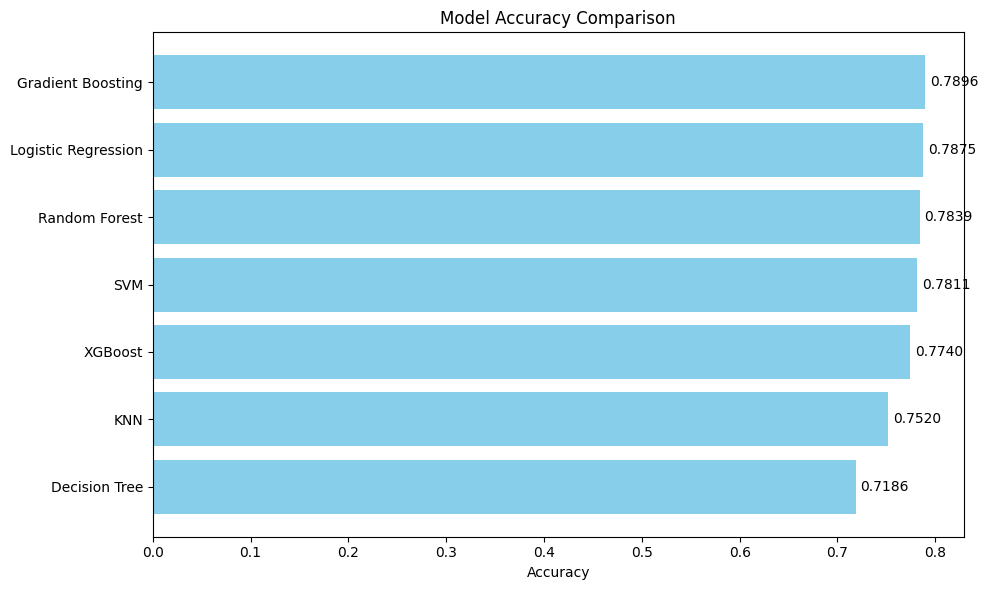

In [28]:
import matplotlib.pyplot as plt

# Sort models by accuracy (optional)
sorted_models = dict(sorted(model_accuracies.items(), key=lambda item: item[1], reverse=True))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(list(sorted_models.keys()), list(sorted_models.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.gca().invert_yaxis()  # Highest accuracy on top
for i, (model, acc) in enumerate(sorted_models.items()):
    plt.text(acc + 0.005, i, f'{acc:.4f}', va='center')

plt.tight_layout()
plt.show()
